# Many Body Simulations
*The three-body problem and Mercury Precession*

In [1]:
!git clone https://github.com/manualAlan/ComPhys.git

Cloning into 'ComPhys'...


* **Author:**

* **Date:**

* **Time spent on this assignment:**

In the previous assignment, you produced a simulation which did gravity simulations for one particle (like the Earth) with a non-moving central mass (like the Sun).  In this assignment, we will
* modify our simulation to work with an arbitrary number of bodies.
* Learn some things about using Jax, an important machine learning framework

We will also use Jax to simulate pendulum in an easier way.

In [ ]:
from jax.config import config
config.update("jax_enable_x64", True)
import numpy as np
import matplotlib.pyplot as plt
import math
from jax import jit, grad
import jax.numpy as jnp
import jax
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','math','jax','jnp','jit','grad']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
resetMe()
import datetime;datetime.datetime.now()

datetime.datetime(2022, 10, 6, 17, 43, 8, 585743)

In [ ]:
resetMe()
SolarSystemParameters=dict()
SolarSystemParameters["MercuryOrbitRadius"   ] = 57.9e9    # meters
SolarSystemParameters["MercuryPerihelion"    ] = 46.0012e9 # meters
SolarSystemParameters["MercuryAphelion"      ] = 69.8169e9 # meters

SolarSystemParameters["EarthRadius"          ] = 6.371e6 # meters
SolarSystemParameters["EarthRotatingVelocity"] = 444.444 # meters per second
SolarSystemParameters["EarthOrbitRadius"     ] = 149.6e9 # meters
SolarSystemParameters["EarthOrbitVelocity"   ] = 30e3    # meters per secon
SolarSystemParameters["EarthMass"            ] = 5.972e24 # kg
SolarSystemParameters["MoonOrbitRadius"      ] = 363228.9e3
SolarSystemParameters["MoonMass"             ] = 7.34e22 # kg

SolarSystemParameters["SunRadius"            ] = 695.51e3 #meters
SolarSystemParameters["SunMass"              ] = 1.989e30 # kg
SolarSystemParameters["G"                    ] = 6.67408e-11


### Automatic Differentiation

Automatic differentiation is the process by which the derivative of a piece of code is automatically taken.  [Jax](https://jax.readthedocs.io/en/latest/index.html) is a framework that allows you to do this.

Suppose you had a function
```python
def myFunction(x):
    return 2*x*x+3*x+1
````

🦉Go ahead and write a piece of code which plots this function for $-5 \leq x \leq 5$

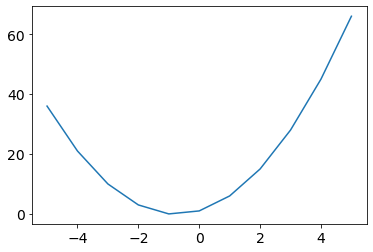

In [ ]:
### PUT YOUR PLOT HERE
def myFunction(x):
    return 2*x*x+3*x+1
x = []
y = []
for i in range(-5,6):
  x.append(i)
  y.append(myFunction(i))
plt.plot(x,y)


Now we can make a new function.  It's going to call `grad(myFunction)` which will return not the output of `myFunction` but the output of its derivative.
```python
def myDerivFunction(x):
   return grad(myFunction)(x)
```

Plot this new function.  You should see that it's the derivative of your other function.



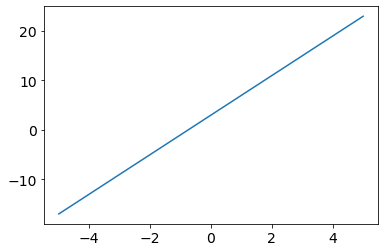

In [ ]:
### PUT YOUR PLOT HERE
def myDerivFunction(x):
   return grad(myFunction)(x)
x = []
y = []
for i in range(-5,6):
  i = 1.0*i
  x.append(i)
  y.append(myDerivFunction(i))
plt.plot(x,y)


## Exercise 1: Easier Forces

* **List of collaborators:**

* **References you used in developing your code:**

### a. Automatic Differentiation

For most forces (air resistance is an exception), we can get the force by taking the negative of the gradient of the potential energy - i.e.
 $-\nabla E(x,y,z) = -\partial E/\partial x -\partial E/\partial y - \partial E/\partial z $

This is advantageous because the energy is much easier to write down then the force.  For example, the gravitational energy between two particles is
$$ E(\vec{r_1},\vec{r_2}) = \frac{GMm}{|\vec{r_1}-\vec{r_2}|}$$

🦉Implement the energy function `def E(t,pos,v,params)` where `pos` is the position and `v` is the velocity of an orbiting planet from the Sun at the origin.  If you are using `numpy` (i.e. `np`) please replace it with `jnp` for this function (it will do the same thing but use the jax version of numpy).

Your energy function should look like this
```python
resetMe(['SolarSystemParameters'])
def E(t,pos,v,params):
    '''
    t: time
    pos: position
    vel: velocity
    params: dictionary of params
    Returns:
        Force: the force
    
    '''    
    G=params['G'] #this is the gravitational constant #!#
    M=params['M']  # this is the mass of the sun #!#
    m=params['m'] # this is the mass of the object #!#
    return G*M*m/jnp.linalg.norm(pos)#!#
```


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

In [ ]:
### ANSWER HERE
resetMe(['SolarSystemParameters'])
def E(t,pos,v,params):
    G=params['G'] #this is the gravitational constant #!#
  # this is the mass of the sun #!#
    m=SolarSystemParameters['EarthMass']
    dt = 0.01
    M = SolarSystemParameters["SunMass"]
    G = SolarSystemParameters["G"]
    return G*M*m/jnp.linalg.norm(pos)

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

Now we are going to write a force function which uses jax to automatically compute the derivatives using automatic differentiation:
```python
def F(t,pos,v,params):
    return grad(E,1)(t,pos,v,params)
```

The function `grad(E,1)` takes the energy function and returns a new function which computes the gradient with respect to the first parameter (`pos`).  (If you are not amazed at this, you should be)

🦉Go ahead and run your orbital dynamics using your new force function for Earth going around the sun (it will be slower unfortunately because jax numpy is slower then real numpy but it will still be useful for our purposes).  Plot this orbit and see that you get the same result as you previously did in an earlier homework.  Use a time-step (`dt`) of 1 day.  Run for a time of 95% of a year. You may have to remove all the `assert` which check for numpy arrays.


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

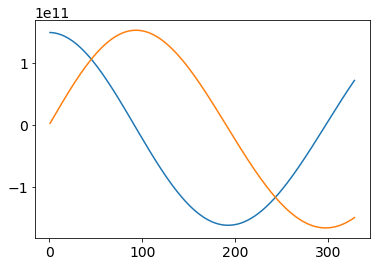

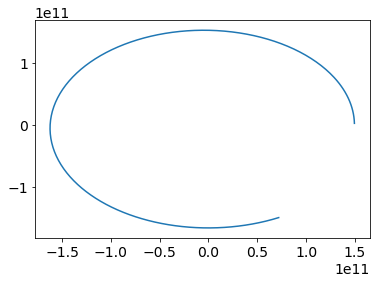

In [ ]:
### ANSWER HERE
def E(t,pos,v,params):
    G=params['G'] #this is the gravitational constant #!#
  # this is the mass of the sun #!#
    m=SolarSystemParameters['EarthMass']
    dt = 0.01
    M = SolarSystemParameters["SunMass"]
    G = SolarSystemParameters["G"]
    return G*M*m/jnp.linalg.norm(pos)
def F(t,pos,v,params):
    return grad(E,1)(t,pos,v,params)
def Step(t, pos, v, params):
  a = F(t, pos, v, params)/SolarSystemParameters['EarthMass']
  dt = 86400
  v_mid = v + a*dt/2
  new_pos = pos + dt*v_mid
  new_vel = v + dt*a
  new_t = t + dt
  return new_t, new_pos, new_vel
ts = []
poss = []
vels = []
t, pos, v = 0, jnp.array([SolarSystemParameters["EarthOrbitRadius"], 0]), jnp. array([0, SolarSystemParameters["EarthOrbitVelocity"]])
for i in range(0, int(365.25*0.9)):
  t, pos, v = Step(t, pos, v, SolarSystemParameters)
  ts. append(t)
  poss.append(pos)
  vels.append(v)
ts = jnp.array(ts)/86400
poss = jnp.array(poss)
vels = jnp.array(vels)
plt.plot(ts, [pos[0] for pos in poss], label = "x")
plt.plot(ts, [pos[1] for pos in poss], label = "y")
plt.show()
plt.plot([pos[0] for pos in poss], [pos[1] for pos in poss], label = "xy")
plt.show()




<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

## Exercise 2. Forces from Energy and Two Orbiting Suns

* **List of collaborators:**

* **References you used in developing your code:**

### a. Orbiting Suns

Suppose instead of the Earth orbitting the Sun, we wanted to simulate two Suns (a binary star system). Because two suns have the same (or potentially similar) mass, we can't use the assumption that we've used so far that the one star orbits the other.  Instead they are going to orbit around each other.  We can make a small number of changes to get our code to work with these two stars.

🦉
* You will need now to send the position of both Sun's around.  To do this, you should just have to change your `params` dictionary for the initial position (put one Sun at the Earth's radius and one at (0,0) ) and the initial velocity (make one start at the velocity of the Earth and one have no velocity).  Your new initial position and velocities should now be an array of length four.
*  Change your energy to be the difference of positions so that your $1/r$ has the $r$ being the difference beteween the two sun locations.
* Make sure no where else in your code you are assuming that there are only two coordinates. This is probably already the case but if it's not, you should fix it.
* *Minor Change:* If you have a crash radius on, turn it off.

Run it for a year with the same time-step of 1 day.  Use two suns of the same mass.

Plot the following:
* $y$ vs $x$ position of the two suns
* $y$ vs $x$ position of the two suns *subtracting off the center of mass velocity*.

Also, animate $y$ vs $x$ as a function of time.

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

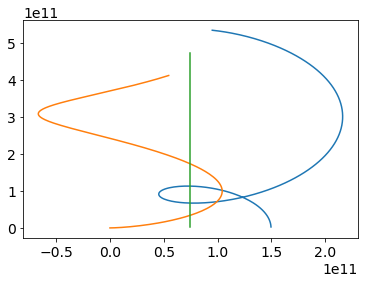

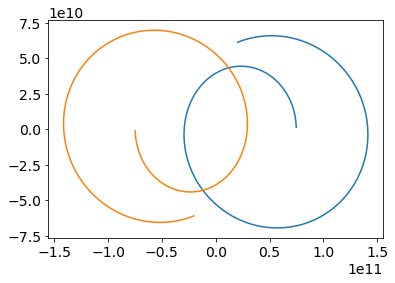

In [ ]:
def E(t,pos,v,params):
    pos = ((pos[0]-pos[2])**2+(pos[1]-pos[3])**2)**(1/2)
    dt = 0.01
    M = SolarSystemParameters["SunMass"]
    G = SolarSystemParameters["G"]
    return G*M*M/jnp.linalg.norm(pos)
def F(t,pos,v,params):
    return grad(E,1)(t,pos,v,params)
def Step(t, pos, v, params):
  a = F(t, pos, v, params)/SolarSystemParameters['SunMass']
  dt = 86400
  v_mid = v + a*dt/2
  new_pos = pos + dt*v_mid
  new_vel = v + dt*a
  new_t = t + dt
  return new_t, new_pos, new_vel
ts = []
poss = []
vels = []
poss_no_com = []
t, pos, v = 0, jnp.array([SolarSystemParameters["EarthOrbitRadius"], 0, 0, 0]), jnp. array([0, SolarSystemParameters["EarthOrbitVelocity"], 0, 0])
for i in range(0, int(365.25)):
  t, pos, v = Step(t, pos, v, SolarSystemParameters)
  ts. append(t)
  poss.append(pos)
  vels.append(v)
  poss_no_com.append(pos - np.array([(pos[0] + pos[2])/2,(pos[1] + pos[3])/2,(pos[0] + pos[2])/2,(pos[1] + pos[3])/2]))
positions = jnp.array(poss)
poss_no_com = jnp.array(poss_no_com)
vels = jnp.array(vels)
plt.plot(positions[:,0], positions[:,1])
plt.plot(positions[:,2], positions[:,3])
plt.plot((positions[:,0] + positions[:,2])/2, (positions[:,1] + positions[:,3])/2)#this is the moving COM position
plt.show()
plt.plot(poss_no_com[:,0], poss_no_com[:,1])
plt.plot(poss_no_com[:,2], poss_no_com[:,3])#poss_no_com is the position with the moving of COM removed
plt.show()



In [ ]:
from matplotlib import animation
from IPython.display import HTML

from matplotlib.cm import get_cmap

name = "Accent"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

def animateMe(positions,fullLine=True):
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure();
    x_min=np.min(list(positions[:,0])+list(positions[:,2]))*1.1
    x_max=np.max(list(positions[:,0])+list(positions[:,2]))*1.1
    y_min=np.min(list(positions[:,1])+list(positions[:,3]))*1.1
    y_max=np.max(list(positions[:,1])+list(positions[:,3]))*1.1
    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    ax.set_prop_cycle(color=colors)
    line, = ax.plot([], [],'go', ms=10);


    plt.close(fig)
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):

        x = positions[:,0]
        y = positions[:,1]
        ll=np.shape(positions)[1]
        xx=np.array(range(0,ll,2))
        yy=np.array(range(1,ll,2))
        if fullLine:
            line.set_data(positions[0:i,xx], positions[0:i,yy])
        else:
            line.set_data(positions[i,xx],positions[i,yy])
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(positions), interval=20,
                                   blit=True,repeat=False);
    return anim




In [ ]:
anim=animateMe(positions[::1,:],False)
HTML(anim.to_html5_video())

In [ ]:
anim=animateMe(poss_no_com[::1,:],False)
HTML(anim.to_html5_video())

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

### b. Cleaning up the mass

🦉This time do the same calculation with one of the Sun's having half the mass of the other.  Here you need to be careful when you compute the acceleration that you are using the right mass to divide the force of the right Sun.

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

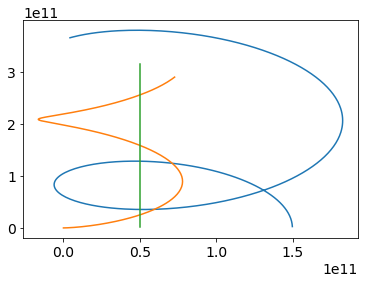

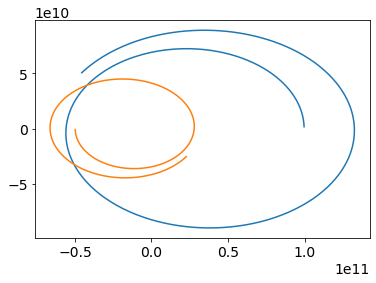

In [ ]:
### ANSWER HERE
def E(t,pos,v,params):
    pos = ((pos[0]-pos[2])**2+(pos[1]-pos[3])**2)**(1/2)
    dt = 0.01
    M = SolarSystemParameters["SunMass"]
    G = SolarSystemParameters["G"]
    return G*M*M/ 2/jnp.linalg.norm(pos)
def F(t,pos,v,params):
    return grad(E,1)(t,pos,v,params)
def Step(t, pos, v, params):
  a = jnp.array([F(t, pos, v, params)[0]/SolarSystemParameters['SunMass']*2,F(t, pos, v, params)[1]/SolarSystemParameters['SunMass']*2, F(t, pos, v, params)[2]/SolarSystemParameters['SunMass'],F(t, pos, v, params)[3]/SolarSystemParameters['SunMass']])
  dt = 86400
  v_mid = v + a*dt/2
  new_pos = pos + dt*v_mid
  new_vel = v + dt*a
  new_t = t + dt
  return new_t, new_pos, new_vel
ts = []
poss = []
vels = []
poss_no_com2 = []
t, pos, v = 0, jnp.array([SolarSystemParameters["EarthOrbitRadius"], 0, 0, 0]), jnp. array([0, SolarSystemParameters["EarthOrbitVelocity"], 0, 0])
for i in range(0, int(365.25)):
  t, pos, v = Step(t, pos, v, SolarSystemParameters)
  ts. append(t)
  poss.append(pos)
  vels.append(v)
  poss_no_com2.append(pos - np.array([(pos[0]/2 + pos[2])/1.5, (pos[1]/2 + pos[3])/1.5,(pos[0]/2 + pos[2])/1.5, (pos[1]/2 + pos[3])/1.5 ]))
poss_no_com2 = np.array(poss_no_com2)
positions = jnp.array(poss)
vels = jnp.array(vels)
plt.plot(positions[:,0], positions[:,1])
plt.plot(positions[:,2], positions[:,3])
plt.plot((positions[:,0]/2 + positions[:,2])/1.5, (positions[:,1]/2 + positions[:,3])/1.5)
plt.show()
plt.plot(poss_no_com2[:,0], poss_no_com2[:,1])
plt.plot(poss_no_com2[:,2], poss_no_com2[:,3])#poss_no_com is the position with the moving of COM removed
plt.show()




In [ ]:
anim=animateMe(positions[::1,:],False)
HTML(anim.to_html5_video())

In [ ]:
anim=animateMe(poss_no_com2[::1,:],False)
HTML(anim.to_html5_video())

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

## Exercise 3. Three Planets

* **List of collaborators:**

* **References you used in developing your code:**

### a. Three Planets

While the one and two body can be dealt with analytically, once you have a three-body problem you must use numerics.  In this exercise, modify your energy function to work with three particles (you should be computing three distances in this function).  

🦉 Plot the $y$ vs $x$ for three particles all with a mass of  `m=1.49925038e+34` with`dt=60.*60.` for the following two sets of initial conditions.  Plot after subtracting out the center of mass! Animate them both.

**Condition 1:**
```python
param["T"]=60.*60.*24.0*100
params["initPos"]= jnp.array([ 9.5000436e+11, -2.4308753e+11, -9.7000436e+11 , 2.4308753e+11,
  0.0000000e+00,  0.0000000e+00])
params["initVel"]= jnp.array([ 466203.685 , 432365.73 ,  466203.685  ,432365.73 , -932407.37 , -864731.48 ])
```

**Condition 2:**
```python
param["T"]=60.*60.*24.0*1000
params["initPos"]= jnp.array([ 8.75415651e+11, -2.74475729e+11, -9.55851880e+11 , 2.26509575e+11,0.00000000e+00,  0.00000000e+00])
params["initVel"]= jnp.array([ 390853.52382274,  418580.80002714,  501291.7617827 ,  456901.09924283,-954861.69488255, -948996.44017539])
 ```





 and use a mass `m=1.49925038e+34`  for `T=60.*60.*24.0*1000` (start shorter for testing) and a `dT=60*60` Plot it out (I suggest using `--` for your plotting marker) as well as animate it.

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

red dots are the center of mass


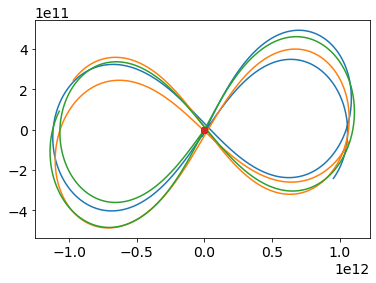

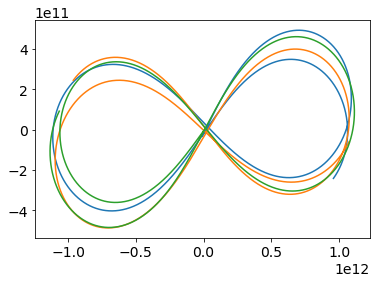

In [ ]:
### ANSWER HERE
params = {
}
params["T"]=60.*60.*24.0*100
params["initPos"]= jnp.array([ 9.5000436e+11, -2.4308753e+11, -9.7000436e+11 , 2.4308753e+11,
  0.0000000e+00,  0.0000000e+00])
params["initVel"]= jnp.array([ 466203.685 , 432365.73 ,  466203.685  ,432365.73 , -932407.37 , -864731.48 ])
pos = params["initPos"]
v = params["initVel"]
def E(t,pos,v,params):
    m=1.49925038e+34
    pos = 1/((pos[0]-pos[2])**2+(pos[1]-pos[3])**2)**(1/2) + 1/((pos[0]-pos[4])**2+(pos[1]-pos[5])**2)**(1/2) + 1/((pos[2]-pos[4])**2+(pos[3]-pos[5])**2)**(1/2)
    G = SolarSystemParameters["G"]
    return G*m*m*pos
def F(t,pos,v,params):
    return grad(E,1)(t,pos,v,params)
def Step(t, pos, v, params):
  a = F(t, pos, v, params)/1.49925038e+34
  dt = 60*60
  v_mid = v + a*dt/2
  new_pos = pos + dt*v_mid
  new_vel = v + dt*a
  new_t = t + dt
  return new_t, new_pos, new_vel
ts = []
poss = []
vels = []
t = 0
while t < params["T"]:
  t, pos, v = Step(t, pos, v, SolarSystemParameters)
  ts. append(t)
  poss.append(pos)
  vels.append(v)
positions = jnp.array(poss)
print("red dots are the center of mass")
plt.plot(positions[:,0], positions[:,1])
plt.plot(positions[:,2], positions[:,3])
plt.plot(positions[:,4], positions[:,5])
plt.plot((positions[:,0] + positions[:,2] + positions[:,4])/3, (positions[:,1] + positions[:,3] + positions[:,5])/3, "o")
plt.show()
plt.plot(positions[:,0]-(positions[:,0] + positions[:,2] + positions[:,4])/3, positions[:,1]-(positions[:,1] + positions[:,3] + positions[:,5])/3)
plt.plot(positions[:,2]-(positions[:,0] + positions[:,2] + positions[:,4])/3, positions[:,3]-(positions[:,1] + positions[:,3] + positions[:,5])/3)
plt.plot(positions[:,4]-(positions[:,0] + positions[:,2] + positions[:,4])/3, positions[:,5]-(positions[:,1] + positions[:,3] + positions[:,5])/3)


In [ ]:
#animate condition 1

from matplotlib import animation
from IPython.display import HTML

from matplotlib.cm import get_cmap

name = "Accent"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

def animateMe(positions,fullLine=True):
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure();
    x_min=np.min(list(positions[:,0])+list(positions[:,2]))*1.1
    x_max=np.max(list(positions[:,0])+list(positions[:,2]))*1.1
    y_min=np.min(list(positions[:,1])+list(positions[:,3]))*1.1
    y_max=np.max(list(positions[:,1])+list(positions[:,3]))*1.1
    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    ax.set_prop_cycle(color=colors)
    line, = ax.plot([], [],'go', ms=10);


    plt.close(fig)
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):

        x = positions[:,0]
        y = positions[:,1]
        ll=np.shape(positions)[1]
        xx=np.array(range(0,ll,2))
        yy=np.array(range(1,ll,2))
        if fullLine:
            line.set_data(positions[0:i,xx], positions[0:i,yy])
        else:
            line.set_data(positions[i,xx],positions[i,yy])
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(positions), interval=20,
                                   blit=True,repeat=False);
    return anim


stepSize=len(positions)//1000
anim=animateMe(positions[::stepSize,:],False)
HTML(anim.to_html5_video())

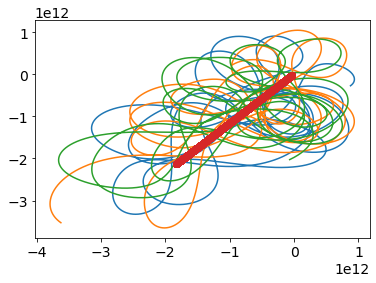

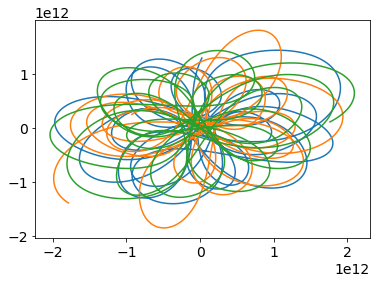

In [ ]:
#### ANSWER HERE
params = {
}
params["T"]=60.*60.*24.0*1000
params["initPos"]= jnp.array([ 8.75415651e+11, -2.74475729e+11, -9.55851880e+11 , 2.26509575e+11,0.00000000e+00,  0.00000000e+00])
params["initVel"]= jnp.array([ 390853.52382274,  418580.80002714,  501291.7617827 ,  456901.09924283,-954861.69488255, -948996.44])
pos = params["initPos"]
v = params["initVel"]
@jit
def E(t,pos,v,params):
    m=1.49925038e+34
    r_inverse = 1/((pos[0]-pos[2])**2+(pos[1]-pos[3])**2)**(1/2) + 1/((pos[0]-pos[4])**2+(pos[1]-pos[5])**2)**(1/2) + 1/((pos[2]-pos[4])**2+(pos[3]-pos[5])**2)**(1/2)
    G = SolarSystemParameters["G"]
    return G*m*m*r_inverse
@jit
def F(t,pos,v,params):
    return grad(E,1)(t,pos,v,params)

def Step(t, pos, v, params):
  a = F(t, pos, v, params)/1.49925038e+34
  dt = 60*60
  v_mid = v + a*dt/2
  new_pos = pos + dt*v_mid
  new_vel = v + dt*a
  new_t = t + dt
  return new_t, new_pos, new_vel
ts = []
poss = []
vels = []
t = 0
while t < params["T"]:
  t, pos, v = Step(t, pos, v, SolarSystemParameters)
  poss.append(pos)
positions = jnp.array(poss)
plt.plot(positions[:,0], positions[:,1])
plt.plot(positions[:,2], positions[:,3])
plt.plot(positions[:,4], positions[:,5])
plt.plot((positions[:,0] + positions[:,2] + positions[:,4])/3, (positions[:,1] + positions[:,3] + positions[:,5])/3, "o")
plt.show()
plt.plot(positions[:,0]-(positions[:,0] + positions[:,2] + positions[:,4])/3, positions[:,1]-(positions[:,1] + positions[:,3] + positions[:,5])/3)
plt.plot(positions[:,2]-(positions[:,0] + positions[:,2] + positions[:,4])/3, positions[:,3]-(positions[:,1] + positions[:,3] + positions[:,5])/3)
plt.plot(positions[:,4]-(positions[:,0] + positions[:,2] + positions[:,4])/3, positions[:,5]-(positions[:,1] + positions[:,3] + positions[:,5])/3)


In [ ]:
### ANSWER HERE
stepSize=len(positions)//1000
anim=animateMe(positions[::stepSize,:],False)
HTML(anim.to_html5_video())

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

## Exercise 4: Full Solar System Dynamics (Extra Credit)

* **List of collaborators:**

* **References you used in developing your code:**

**(These don't have to be done in order although succeeding in some of them will essentially complete others)**

### a. Symplectic Integration (EC: 5 points)

Replace your second order integrator with a symplectic integrator.  Such an integrator has similar error profile but has a physical property that it conserves an energy for a (slightly different) Hamiltonian which makes it better for planetary simulations

In [ ]:
### ANSWER HERE




### b.  Full Solar System (EC: 15 points)

Modify your simulation to work with an arbitrary number of bodies.  You want your energy function to have no "for loops" in it - only numpy calls.  (Also come ask me how to speed up your code by appropriate additions of @jit). Then figure out how to get correct initial conditions for planets (astropy should help). Go ahead and implement a full solar system simulation for the eight planets.

In [ ]:
from matplotlib import animation
from IPython.display import HTML

from matplotlib.cm import get_cmap

name = "Accent"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

def animateMe(positions,fullLine=True):
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure();
    x_min=np.min(list(positions[:,0])+list(positions[:,2]))*1.1
    x_max=np.max(list(positions[:,0])+list(positions[:,2]))*1.1
    y_min=np.min(list(positions[:,1])+list(positions[:,3]))*1.1
    y_max=np.max(list(positions[:,1])+list(positions[:,3]))*1.1
    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    ax.set_prop_cycle(color=colors)
    line, = ax.plot([], [],'go', ms=10);


    plt.close(fig)
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):

        x = positions[:,0]
        y = positions[:,1]
        ll=np.shape(positions)[1]
        xx=np.array(range(0,ll,2))
        yy=np.array(range(1,ll,2))
        if fullLine:
            line.set_data(positions[0:i,xx], positions[0:i,yy])
        else:
            line.set_data(positions[i,xx],positions[i,yy])
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(positions), interval=20,
                                   blit=True,repeat=False);
    return anim


In [ ]:

masses = [1.98*1000000,0.330,4.87, 5.97, 0.642, 1898, 568, 86.8, 102.]
pos = [0.,0.,57.9, 0,108.2,0., 149.6,0, 228.0,0., 778.5,0., 1432.0,0., 2867.0,0., 4515.0,0.]
v = [0.,0.,0.,47.4,0, 35.0,0., 29.8, 0.,24.1,0., 13.1,0., 9.7,0., 6.8,0., 5.4, 0.,4.7]
double_masses = [1.98*1000000, 1.98*1000000,0.330,0.330,4.87, 4.87, 5.97, 5.97, 0.642, 0.642, 1898, 1898, 568,568, 86.8,86.8, 102, 102]
masses = np.array(masses)*1e24
double_masses = np.array(double_masses)*1e24
pos = np.array(pos)*1e9
v = np.array(v)*1000

def E(t,pos,v,params):
  E = 0
  G = SolarSystemParameters["G"]
  for i in range(0,len(masses)):
    for j in range(i + 1, len(masses)):
      E += G*masses[i]*masses[j]/jnp.linalg.norm([pos[2*i]-pos[2*j], pos[2*i + 1]-pos[2*j + 1]])
  return E

def F(t,pos,v,params):
    return grad(E,1, allow_int = True)(t, pos,v,params)

def Step(t, pos, v, params):
  a = F(t, pos, v, params)/masses
  dt = 60*60
  v_mid = v + a*dt/2
  new_pos = pos + dt*v_mid
  new_vel = v + dt*a
  new_t = t + dt
  return new_t, new_pos, new_vel
ts = []
poss = []
vels = []
t = 0

def appends(period):
  pos = [0,0,57.9, 0,108.2,0, 149.6,0, 228.0,0, 778.5,0, 1432.0,0, 2867.0,0, 4515.0,0]
  v = [0,0,0,47.4,0, 35.0,0, 29.8, 0,24.1,0, 13.1,0, 9.7,0, 6.8,0, 5.4, 0,4.7]
  poss = []
  t = 0
  while t < period:
    t, pos, v = Step(t, pos, v, SolarSystemParameters)
    poss.append(pos)
  return poss
positions = np.array(appends(86400*365))

plt.plot(positions[:,0], positions[:,1])
plt.plot(positions[:,2], positions[:,3])
plt.plot(positions[:,4], positions[:,5])
plt.plot(positions[:,6], positions[:,7])
plt.plot(positions[:,8], positions[:,9])
plt.plot(positions[:,10], positions[:,11])
plt.plot(positions[:,12], positions[:,13])
plt.plot(positions[:,14], positions[:,15])
plt.plot(positions[:,16], positions[:,17])


UFuncTypeError: ignored

### c. Voyager Simulation (EC: 10 points)

After finishing part (b), figure out reasonable initial conditions from Voyager 1 or Voyager 2 and get a flyby (of at least Jupiter and Saturn) to work correctly in your simulation.

### d. Lagrange Points (EC: 5 points)

**This problem can be done with only a three-body simulation working**

Find the five lagrange points around the Earth-Sun system.  You can either do this by looking up/calculating where they should be or by doing a `scipy.optimize` to find them.  Show that they are lagrange points and show (by perturbing your satellite in the simulation at those points) that two of them are stable and the other three are unstable.

### e.  The nice model (EC: 35 points)

Simulate the nice model (https://en.wikipedia.org/wiki/Nice_model) with the four gas giants planets and a thousand disk planetismal belt and show the gas giants move from their initial position to (something close) to their current position.

### f.  Your universe (EC: 5 points)

Setup a cool set of initial conditions for a multiple-body gravitational simulation and simulate!

## Exercise 5

### a. Solving Euler-Lagrange with no work

Getting the dynamics for the double pendula working was somewhat tricky.  In particular, we had to work out the equations of motion which were somewhat painful.  Earlier we managed to avoid much of this work by using automatic differentiation on the energy. This doesn't quite work here because of the constraints.  Instead we should *work in generalized coordinates and solve the Euler-Largrange equation.*. The Euler-Lagrange equation takes a *Lagrangian* $\mathcal{L}$ and produces a differential equation we can solve to get the equations of motion

$$
\frac{d}{dt} \nabla_{dq/dt}\mathcal{L} = \nabla_{q} \mathcal{L}
$$
where $\nabla_q\mathcal{L} = \frac{\partial\mathcal{L}}{\partial q}$
Working in generalized coordinates just means working in some coordinates that recognize the constraints.  For example, by working with $\theta_1$ and $\theta_2$ we can't violate the constraint of a rigid rod no matter what values we choose.   On the other hand, if we were to work with ($x_1, y_1,x_2,y_2$) of the masses we could choose parameters that would allow for the rod to be too long, or simulation errors could change the length of the rod.

The Lagrangian equation is simple... The Lagrangian just $\mathcal{L}=T-V$ where $T$ is the kinetic energy and $V$ is the potential energy. The kinetic energy is just $1/2 m_1 v_1^2 + 1/2 m_2 v_2^2$ whereas the potential energy is $mgy_1 + mgy_2$.  Convert these into something which depends on $\theta_1$, $d{\theta_1}/dt=\omega_1$ (and the $\theta_2$ equivalents).  
🦉 Write a python function that produces the Lagrangian.

Now we need to solve the Euler-Lagrange equations.  If we call our generalized coordinates, $q$ (i.e. $\theta$), then we need to solve them for $ \frac{\mathrm{d}^2q}{ \mathrm{d}t^2}$ (i.e $ \frac{\mathrm{d}^2\theta}{ \mathrm{d}t^2}$.  Then we can treat this (times a mass $m$) as a force which we can put into our dynamics code.  Amazingly, there is an algorithm tht allows us to do this for any lagrangian.  See Appendix A of [[1]](#fn1), which we've copied here in our notation:

$$
 \frac{\mathrm{d}^2\theta}{ \mathrm{d}t^2} = (\nabla_\omega \nabla^T_\omega \mathcal{L})^{-1}[\nabla_\theta \mathcal{L}-(\nabla_\theta\nabla_\omega^T\mathcal{L})\omega]
$$

(where $\omega=\frac{d\theta}{dt}$)
```python

def lagrangian(pos,vel,params,t):
    #finish this...
    return T-V

f1=jit(jax.hessian(jit(lagrangian), 1))
f2=jit(jax.grad(jit(lagrangian), 0))
f3=jit(jax.jacfwd(jit(jax.grad(jit(lagrangian), 1)), 0))
```
Note the ordering of the parameters is important here.  

Now we can use these function to find an acceleration:
```python
#...
#now you can do this to find a:
a = (jax.numpy.linalg.pinv(f1(pos, vel,params,t)) @ (
        f2(pos,vel,params,t) - f3(pos,vel,params,t) @ vel))
#...

```

 🦉 Now write code that takes any lagrangian and does the dynamics.  Verify it gives you the same answer from the double pendulum using forces.

Notice that it now is essentially trivially to get a triple pendulum (or many other things) working.  

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

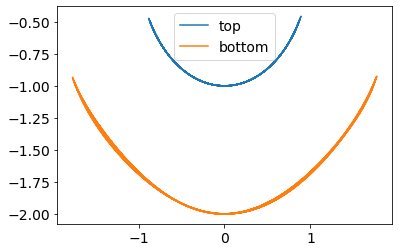

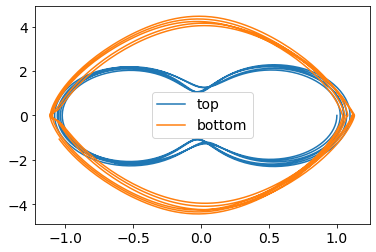

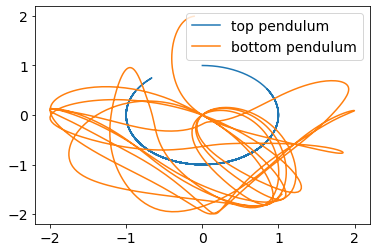

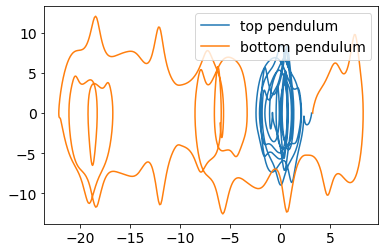

In [ ]:
### ANSWER HERE
params={ 'm1':1.0,
         'm2':1.0,
         'l1':1.0,
         'l2':1.0,
         'T' :15.0,
         'g' :9.8,
         'dt':0.01,
         'initPos' : jnp.array([1,1+0.11]),
         'initVel' : jnp.array([0.0,0.0])
       }
def lagrangian(pos, v, params, t):
  l1 = params['l1']
  l2 = params['l2']
  m1 = params['m1']
  m2 = params['m2']
  g = params['g']
  new_pos0 = pos[0]
  new_pos1 = pos[1]
  new_v0 = v[0]
  new_v1 = v[1]
  V = -g*(m1+m2)*l1*jnp.cos(new_pos0)-m2*g*l2*jnp.cos(new_pos1)
  T = 1/2*m1*l1**2*new_v0**2+1/2*m2*(l1**2*new_v0**2+l2**2*new_v1**2+2*l1*l2*new_v0*new_v1*jnp.cos(new_pos0-new_pos1))
  return T-V
f1=jit(jax.hessian(jit(lagrangian), 1))
f2=jit(jax.grad(jit(lagrangian), 0))
f3=jit(jax.jacfwd(jit(jax.grad(jit(lagrangian), 1)), 0))
def LagStep(t, pos, v, params):
  m1 = params['m1']
  m2 = params['m2']
  dt = params['dt']
  a = (jax.numpy.linalg.pinv(f1(pos, v,params,t)) @ (
    f2(pos,v,params,t) - f3(pos,v,params,t) @ v))
  v_mid = v + a*dt/2
  x_mid = pos + v*dt/2
  a = (jax.numpy.linalg.pinv(f1(x_mid, v_mid,params,t+dt/2)) @ (
    f2(x_mid, v_mid,params,t+dt/2) - f3(x_mid, v_mid,params,t+dt/2) @ v))
  new_pos = pos + dt*v_mid
  new_v = v + dt*a
  new_t = t + dt
  return new_t, new_pos, new_v
#############
ts = []
vs = []
poss2 = []
positions = []
t = 0
pos = params['initPos']
v = params['initVel']
T = params['T']
while t < T:
  ts.append(t)
  vs.append(v)
  poss2.append(pos)
  positions.append([np.sin(pos[0])*1, -np.cos(pos[0])*1, np.sin(pos[0])*1+np.sin(pos[1])*1, -np.cos(pos[0])*1-np.cos(pos[1])*1])
  t, pos, v = LagStep(t, pos, v, params)
vs = np.array(vs)
positions2 = np.array(positions)
poss2 = np.array(poss2)
plt.plot(positions2[:,0], positions2[:,1], label = "top")
plt.plot(positions2[:,2], positions2[:,3], label = "bottom")
plt.legend()
plt.show()
plt.plot(poss2[:,0], vs[:,0], label = "top")
plt.plot(poss2[:,1], vs[:,1], label = "bottom")
plt.legend()
plt.show()
positions2 = np.array(poss2)


###################
params={ 'm1':1.0,
         'm2':1.0,
         'l1':1.0,
         'l2':1.0,
         'T' :15.0,
         'g' :9.8,
         'dt':0.01,
         'initPos' : np.array([3.14,3.14+0.11]),
         'initVel' : np.array([0.0,0.0])
       }
ts = []
vs = []
poss2 = []
positions = []
t = 0
pos = params['initPos']
v = params['initVel']
T = params['T']
while t < T:
  ts.append(t)
  vs.append(v)
  poss2.append(pos)
  positions.append([np.sin(pos[0])*1, -np.cos(pos[0])*1, np.sin(pos[0])*1+np.sin(pos[1])*1, -np.cos(pos[0])*1-np.cos(pos[1])*1])
  t, pos, v = LagStep(t, pos, v, params)
vs = np.array(vs)
poss2 = np.array(poss2)
plt.plot(positions2[:,0], positions2[:,1], label = "top pendulum")
plt.plot(positions2[:,2], positions2[:,3], label = "bottom pendulum")
plt.legend()
plt.show()
plt.plot(poss2[:,0], vs[:,0], label = "top pendulum")
plt.plot(poss2[:,1], vs[:,1], label = "bottom pendulum")
plt.legend()
plt.show()

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

---


1 https://en.wikipedia.org/wiki/Tests_of_general_relativity#Perihelion_precession_of_Mercury

2 http://arxiv.org/abs/1106.1568v1: "When effective theories predict: the # inevitability of Mercury’s anomalous perihelion precession," James D. Wells, CERN Theoretical Physics (PH-TH), CH-1211 Geneva 23, Switzerland & Department of Physics, University of Michigan, Ann Arbor, MI 48109, June 9, 2011.

3 https://en.wikipedia.org/wiki/Two-body_problem_in_general_relativity#Precession_of_elliptical_orbits. I obtain this by taking the post-Newtonian term for the effective radial potential, then differentiating it.

4 https://en.wikipedia.org/wiki/Solar_mass

5 http://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html

6 http://www.mathpages.com/home/kmath280/kmath280.htm


---
<span id="fn1"><sup>1</sup> https://arxiv.org/abs/2003.04630 </span>

**Acknowledgements:**
* Bryan Clark (original)

© Copyright 2021